In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
%matplotlib inline   
### The resulting plots will then also be shown in the notebook document.

from random import sample
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [20]:
df_ratios = pd.read_csv('Financial_ratios_Industry_new.csv')
df_ratios = df_ratios.iloc[0:2763,:]  ### total of 2763 rows
df_ratios.head()

,public_date,gicdesc,NFIRM,futchangeNPM,indret_vw,dpr_Mean,PEG_trailing_Mean,bm_Mean,CAPEI_Mean,divyield_Mean,...,inv_turn_Mean,pay_turn_Mean,rect_turn_Mean,sale_equity_Mean,sale_invcap_Mean,sale_nwc_Mean,accrual_Mean,rd_sale_Mean,adv_sale_Mean,staff_sale_Mean
0,30/6/1999,Communication Services,117,1.0,0.054565,0.301,1.569,0.361,13.074,0.0212,...,55.873,6.210,6.144,2.834,1.382,12.041,-0.119,1.095,0.137,0.009
1,30/6/1999,Consumer Discretionary,1213,1.0,0.056150,0.161,0.645,0.855,72.114,0.0190,...,23.646,13.334,58.938,5.397,2.475,29.005,-0.052,0.128,0.023,0.022
2,30/6/1999,Consumer Staples,281,0.0,-0.010385,0.244,1.747,0.695,22.661,0.0207,...,8.258,12.039,24.457,6.183,2.862,31.724,-0.038,0.007,0.033,0.004
3,30/6/1999,Energy,235,1.0,0.001533,0.407,0.702,0.944,18.062,0.0293,...,95.906,7.264,6.685,2.083,1.285,53.031,-0.160,0.002,0.000,0.020
4,30/6/1999,Financials,1111,0.0,0.032834,0.195,2.133,0.780,28.371,0.0238,...,75.656,6.940,3.380,1.233,0.787,18.764,0.006,0.006,0.007,0.157


In [21]:
# Display the structure
df_ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 74 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   public_date           2763 non-null   object 
 1   gicdesc               2763 non-null   object 
 2   NFIRM                 2763 non-null   int64  
 3   futchangeNPM          2763 non-null   float64
 4   indret_vw             2763 non-null   float64
 5   dpr_Mean              2763 non-null   float64
 6   PEG_trailing_Mean     2763 non-null   float64
 7   bm_Mean               2763 non-null   float64
 8   CAPEI_Mean            2763 non-null   float64
 9   divyield_Mean         2763 non-null   float64
 10  evm_Mean              2763 non-null   float64
 11  pcf_Mean              2763 non-null   float64
 12  pe_exi_Mean           2763 non-null   float64
 13  pe_inc_Mean           2763 non-null   float64
 14  pe_op_basic_Mean      2763 non-null   float64
 15  pe_op_dil_Mean       

In [22]:
# Normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [23]:
for i in df_ratios.columns[4:74]:
    df_ratios[i] = min_max_scaler.fit_transform(df_ratios[[i]].to_numpy())*1000
    df_ratios[i] = df_ratios[i].apply(lambda x: np.log10(x + 0.01))
    ### this normalization is arbitrary, but should put all nos. in comparable basis of the same magnitude - can see the
    ###   describe statistics below

In [24]:
# Statistical summary 
df_ratios.describe()

,NFIRM,futchangeNPM,indret_vw,dpr_Mean,PEG_trailing_Mean,bm_Mean,CAPEI_Mean,divyield_Mean,evm_Mean,pcf_Mean,...,inv_turn_Mean,pay_turn_Mean,rect_turn_Mean,sale_equity_Mean,sale_invcap_Mean,sale_nwc_Mean,accrual_Mean,rd_sale_Mean,adv_sale_Mean,staff_sale_Mean
count,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,...,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000
mean,420.618531,0.412233,2.728514,1.378247,2.715316,0.458653,2.607729,2.065692,2.451795,2.786439,...,0.634144,0.298110,0.585184,0.508315,2.691453,-1.994564,2.179349,-0.893405,0.768851,0.307506
std,320.143851,0.492326,0.116647,0.165621,0.120787,0.299928,0.096913,0.317308,0.125482,0.122661,...,0.502229,0.342616,0.532244,0.472323,0.135440,0.164565,0.162114,1.025923,1.373409,0.855043
min,28.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,147.000000,0.000000,2.700748,1.314751,2.675378,0.304236,2.610040,1.912012,2.455049,2.753396,...,0.451741,0.152914,0.414381,0.299248,2.693495,-1.999989,2.132530,-1.646431,0.579541,-0.316673
50%,257.000000,0.000000,2.739319,1.350982,2.716356,0.479608,2.610040,2.073847,2.455049,2.796943,...,0.698737,0.296976,0.506318,0.527613,2.695204,-1.999989,2.209572,-1.170878,1.318967,0.471577
75%,673.500000,1.000000,2.770784,1.405395,2.761661,0.632305,2.610040,2.250997,2.455049,2.832605,...,0.908014,0.440134,0.803026,0.814671,2.697580,-1.999989,2.256181,-0.352002,1.692428,0.797137
max,1524.000000,1.000000,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,...,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004


In [25]:
df_ratios_new=df_ratios

### Split the dataset: Creating a Training Set and a Test Set

- 25% of the data will be used as the test set and 75% of the data would be used to train our logit model.

In [26]:
le = preprocessing.LabelEncoder() 
### Encode target labels with value between 0 and n_classes-1. This transformer should be used to encode target values, 
###   i.e. y, and not the input X.
le.fit(df_ratios_new.gicdesc)
### For example: 'basketball' = 0, 'football' = 1, 'soccer' = 2, etc.
df_ratios_new.gicdesc = le.transform(df_ratios_new.gicdesc) # encode sector
#le.fit(df_ratios_new.NPM)
#df_ratios_new.NPM = le.transform(df_ratios_new.NPM) # encode NPM

In [10]:
df_ratios_new.head(20)
### note the gicdesc is now transformed to a number instead of name

,public_date,gicdesc,NFIRM,futchangeNPM,indret_vw,dpr_Mean,PEG_trailing_Mean,bm_Mean,CAPEI_Mean,divyield_Mean,...,inv_turn_Mean,pay_turn_Mean,rect_turn_Mean,sale_equity_Mean,sale_invcap_Mean,sale_nwc_Mean,accrual_Mean,rd_sale_Mean,adv_sale_Mean,staff_sale_Mean
0,30/6/1999,0,117,1.0,2.981021,2.822152,2.975233,2.563151,2.964739,2.901882,...,2.775580,2.522937,2.658631,2.700921,2.972647,-1.913737,2.911192,2.661996,2.945877,2.608639
1,30/6/1999,1,1213,1.0,2.981167,2.817959,2.970529,2.715502,2.964739,2.891311,...,2.710986,2.672357,2.828548,2.758352,2.972978,-1.913380,2.928045,2.440926,2.862041,2.684182
2,30/6/1999,2,281,0.0,2.974445,2.820487,2.976074,2.692161,2.964739,2.899697,...,2.592757,2.659684,2.773938,2.768633,2.973095,-1.913323,2.930832,1.849565,2.880356,2.527211
3,30/6/1999,3,235,1.0,2.975744,2.825110,2.970837,2.725502,2.964739,2.927047,...,2.809982,2.571038,2.667629,2.664672,2.972617,-1.912875,2.896038,1.425966,-2.000000,2.676708
4,30/6/1999,4,1111,0.0,2.978950,2.819010,2.977833,2.705614,2.964739,2.911720,...,2.795321,2.558918,2.576980,2.564241,2.972465,-1.913595,2.938506,1.802925,2.795580,2.815358
5,30/6/1999,5,813,0.0,2.979732,2.817077,2.966904,2.673583,2.964739,2.862441,...,2.738780,2.674172,2.710287,2.681637,2.972642,-1.913843,2.920601,2.749060,2.862041,2.714639
6,30/6/1999,6,1032,0.0,2.981533,2.818673,2.971362,2.709624,2.964739,2.890763,...,2.737148,2.700944,2.681074,2.803590,2.973002,-1.913524,2.930445,2.231315,2.760429,2.742436
7,30/6/1999,7,1271,1.0,2.986851,2.814736,2.973195,2.668508,2.964739,2.847997,...,2.726109,2.621130,2.652178,2.693960,2.973012,-1.913758,2.919344,2.594568,2.872116,2.569714
8,30/6/1999,8,300,1.0,2.978261,2.833809,2.976205,2.725812,2.964739,2.904364,...,2.539829,2.639639,2.754053,2.716891,2.972719,-1.913724,2.925493,2.178171,2.712580,2.618232
9,30/6/1999,10,162,0.0,2.971904,2.817173,2.986433,2.726224,2.964739,2.953993,...,2.763764,2.645130,2.700862,2.655803,2.972480,-1.912957,2.930639,-2.000000,-2.000000,2.684182


In [27]:
Train, Test = train_test_split(df_ratios_new, test_size=0.25, random_state=42)
X_train, y_train = Train.iloc[:,4:74], Train.iloc[:,3]
X_test, y_test = Test.iloc[:,4:74], Test.iloc[:,3]

In [28]:
### sample size of X_train is 2763 x .75 = 2072; of X-test is 2763 x .25 = 691
print(X_train.shape,X_test.shape)

(2072, 70) (691, 70)


In [13]:
X_train.head() ### 70 features including NPM level

,indret_vw,dpr_Mean,PEG_trailing_Mean,bm_Mean,CAPEI_Mean,divyield_Mean,evm_Mean,pcf_Mean,pe_exi_Mean,pe_inc_Mean,...,inv_turn_Mean,pay_turn_Mean,rect_turn_Mean,sale_equity_Mean,sale_invcap_Mean,sale_nwc_Mean,accrual_Mean,rd_sale_Mean,adv_sale_Mean,staff_sale_Mean
240,2.970470,2.827696,2.967645,2.727541,2.964739,2.911040,2.949887,2.974939,2.984585,2.980256,...,2.747153,2.529400,2.654061,2.598803,2.972459,-1.913841,2.909609,2.384292,2.919941,2.494552
2250,2.981345,2.826525,2.980604,3.000004,2.964739,2.904364,2.949887,2.990232,2.996342,2.996240,...,2.780357,2.625653,2.424482,2.530525,2.972462,-1.997574,2.935027,1.157060,2.826954,2.847127
582,2.976803,2.819163,2.979371,2.675194,2.964739,2.905160,2.949887,2.986751,2.995803,2.995639,...,2.591938,2.668224,2.778921,2.784805,2.973056,-1.913107,2.926576,1.950934,2.870271,2.569714
790,2.980489,2.829811,2.973104,2.696910,2.964739,2.959543,2.949887,2.976279,2.991814,2.988826,...,2.769741,2.647188,2.702381,2.715494,2.972590,-1.913496,2.911808,1.921949,2.835526,2.597669
1775,2.973126,2.822752,2.971737,2.569035,2.964739,2.894963,2.949887,2.967051,2.992606,2.991875,...,2.745802,2.694479,2.722404,2.659901,2.972562,-1.913917,2.912416,2.822435,2.831426,2.853776


In [14]:
y_train.head()

240     1.0
2250    0.0
582     0.0
790     1.0
1775    1.0
Name: futchangeNPM, dtype: float64

Before we proceed with logit regression using statsmodel, we need to ensure there is no excessive multi-collinearity in the features, or else there will not be convergence in the min loss solution algorithm even if we increase .fit(maxiter=10000)

We first use statsmodel variance_inflation_factor to check for any feature that is very highly collinear with the rest.
Then we remove them from the Logit regression. This step is similar in idea to stepwise regression where features that are not significant and that do not contribute (visibly) to R^2 are removed.

In [29]:
# variance inflation factor，VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor ### higher VIF > 5 means higher multicollinearity

x = X_train
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns] 
### regress each var in x.col on the rest in turn; vif is 70 x 1: = 1/(1-R^2) where R^2 is coeff of determination in regression
### if x1 is highly collinear with others x2, x4, etc., then regression R^2 is high and 1/(1-R^2) = vif for x1 is also high

VIF = pd.DataFrame(vif)
colnames = pd.DataFrame(x.columns)

D:\anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [30]:
VIF.head()

,0
0,1.071515
1,1.196158
2,1.262668
3,2.692079
4,1.024033


In [31]:
VIFname = (pd.concat([
    colnames.reset_index(drop=1).add_suffix('-1'),
    VIF.reset_index(drop=1).add_suffix('_2')
  ], axis=1).fillna(''))  ### concatenate two pandas df cols side by side

In [32]:
### prints vars whose VIF < 5, i.e. R^2 in regression with the rest < 80%
VIFname=VIFname[VIF[0] < 5]
VIFname

,0-1,0_2
0,indret_vw,1.071515
1,dpr_Mean,1.196158
2,PEG_trailing_Mean,1.262668
3,bm_Mean,2.692079
4,CAPEI_Mean,1.024033
5,divyield_Mean,2.845165
7,pcf_Mean,1.209733
14,efftax_Mean,1.207134
15,GProf_Mean,2.101511
16,aftret_eq_Mean,1.024183


In [33]:
X_train.shape, VIFname.iloc[:,1].shape

((2072, 70), (38,))

In [20]:
selfeat=VIFname.iloc[:,0]
print(selfeat)

0                indret_vw
1                 dpr_Mean
2        PEG_trailing_Mean
3                  bm_Mean
4               CAPEI_Mean
5            divyield_Mean
7                 pcf_Mean
14             efftax_Mean
15              GProf_Mean
16          aftret_eq_Mean
17      aftret_equity_Mean
18     aftret_invcapx_Mean
19                gpm_Mean
24        pretret_noa_Mean
27               roce_Mean
28                roe_Mean
29      capital_ratio_Mean
34           rect_act_Mean
35            fcf_ocf_Mean
40         short_debt_Mean
41         profit_lct_Mean
42          curr_debt_Mean
44            dltt_be_Mean
45           int_debt_Mean
46        int_totdebt_Mean
49           de_ratio_Mean
50        debt_assets_Mean
52       debt_capital_Mean
55    cash_conversion_Mean
60           inv_turn_Mean
61           pay_turn_Mean
62          rect_turn_Mean
63        sale_equity_Mean
65           sale_nwc_Mean
66            accrual_Mean
67            rd_sale_Mean
68           adv_sale_Mean
6

In [34]:
### Here we keep only features that do not have multicollinearity R^2 < 0.8
Columns = ['indret_vw','dpr_Mean','PEG_trailing_Mean','bm_Mean','CAPEI_Mean','divyield_Mean','pcf_Mean','efftax_Mean',
           'GProf_Mean','aftret_eq_Mean','aftret_equity_Mean','aftret_invcapx_Mean','gpm_Mean','pretret_noa_Mean',
           'roce_Mean','roe_Mean','capital_ratio_Mean','rect_act_Mean','fcf_ocf_Mean','short_debt_Mean',
           'profit_lct_Mean','curr_debt_Mean','dltt_be_Mean','int_debt_Mean','int_totdebt_Mean','de_ratio_Mean',
           'debt_assets_Mean','debt_capital_Mean','cash_conversion_Mean','inv_turn_Mean','pay_turn_Mean','rect_turn_Mean',
           'sale_equity_Mean','sale_nwc_Mean','accrual_Mean','rd_sale_Mean','adv_sale_Mean','staff_sale_Mean']

X_train1=X_train[Columns]
X_test1=X_test[Columns]

In [35]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, sm.add_constant(X_train1)).fit()
logit_model.summary()
### The Current function value is the value of the loss function when you use the parameters found by the fit.

Optimization terminated successfully.
         Current function value: 0.662469
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           futchangeNPM   No. Observations:                 2072
Model:                          Logit   Df Residuals:                     2033
Method:                           MLE   Df Model:                           38
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                 0.01877
Time:                        12:47:42   Log-Likelihood:                -1372.6
converged:                       True   LL-Null:                       -1398.9
Covariance Type:            nonrobust   LLR p-value:                   0.05874
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   58.8255     69.023      0.852      0.394     -76.457     194.108
indret_vw               -0.7194      0.484     -1.487      0.137      -1.668       0.229
dpr_Mean                 0.3659      0.307      1.194      0.233      -0.235       0.967
PEG_trailing_Mean       -0.0962      0.371     -0.259      0.795      -0.823       0.631
bm_Mean                  0.2301      0.199      1.153      0.249      -0.161       0.621
CAPEI_Mean              -0.6123      0.564     -1.086      0.277      -1.717       0.493
divyield_Mean           -0.5292      0.204     -2.593      0.010      -0.929      -0.129
pcf_Mean                 0.2792      0.416      0.671      0.502      -0.536       1.095
efftax_Mean              0.1547      0.333      0.465      0.642      -0.497       0.807
GProf_Mean              -0.3561      0.447     -0.797      0.425      -1.231       0.519
aftret_eq_Mean         -18.3875     21.107     -0.871      0.384     -59.757      22.982
aftret_equity_Mean       0.3459      0.463      0.748      0.455      -0.561       1.253
aftret_invcapx_Mean     -0.2655      0.341     -0.778      0.437      -0.935       0.404
gpm_Mean                 0.2007      0.425      0.472      0.637      -0.633       1.034
pretret_noa_Mean        -0.2645      0.401     -0.659      0.510      -1.051       0.522
roce_Mean                1.3812      1.051      1.315      0.189      -0.678       3.440
roe_Mean                -1.1940      2.046     -0.583      0.560      -5.205       2.817
capital_ratio_Mean      -0.2226      0.405     -0.550      0.582      -1.016       0.570
rect_act_Mean           -0.1582      0.344     -0.460      0.645      -0.832       0.515
fcf_ocf_Mean             1.4467      7.851      0.184      0.854     -13.941      16.834
short_debt_Mean         -0.1050      0.218     -0.482      0.629      -0.532       0.322
profit_lct_Mean          0.3336      0.477      0.699      0.485      -0.602       1.269
curr_debt_Mean          -0.1373      0.200     -0.688      0.492      -0.529       0.254
dltt_be_Mean             0.0592      0.179      0.331      0.741      -0.291       0.410
int_debt_Mean            0.1970      0.096      2.049      0.040       0.009       0.385
int_totdebt_Mean         0.0764      0.109      0.701      0.483      -0.137       0.290
de_ratio_Mean           -2.4703      6.048     -0.408      0.683     -14.325       9.384
debt_assets_Mean         0.4164      0.266      1.563      0.118      -0.106       0.938
debt_capital_Mean        0.8408      1.301      0.646      0.518      -1.709       3.391
cash_conversion_Mean     0.1226      0.118      1.038      0.299      -0.109       0.354
inv_turn_Mean           -0.0325      0.109     -0.299      0.765      -0.245       0.180
pay_turn_Mean           -0.2241      0.147     -1.524      0.128      -0.512       0.064
rect_turn_Mean          -0.1662      0.132     -1.258      0.208      -0.425       0.093
sale_equity_Mean         0.2542      

In [36]:
predict_result = logit_model.predict(sm.add_constant(X_test1))
predicted_choice = np.where(predict_result > 0.5,1,0)

#Accuracy of the predicting power
accuracy = 1 - np.sum(abs(predicted_choice - y_test))/y_test.shape[0]
accuracy

0.5600578871201158

## Logistic Regression Using Sklearn

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LR = LogisticRegression(max_iter=1000)
Lresult = LR.fit(X_train1, y_train)

y_pred = LR.predict(X_test1)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.557163531114327


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[366  26]
 [280  19]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.93      0.71       392
         1.0       0.42      0.06      0.11       299

    accuracy                           0.56       691
   macro avg       0.49      0.50      0.41       691
weighted avg       0.50      0.56      0.45       691



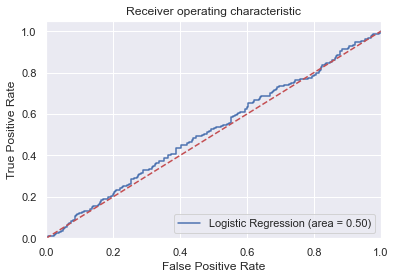

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, LR.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## PCA -- here we use Principal Component Analysis method to reduce the dimension of the features and make combinations of them (the principal components) to be independent one from another

In [41]:
df_ratios.shape, df_ratios.columns[4:74],

((2763, 74),
 Index(['indret_vw', 'dpr_Mean', 'PEG_trailing_Mean', 'bm_Mean', 'CAPEI_Mean',
        'divyield_Mean', 'evm_Mean', 'pcf_Mean', 'pe_exi_Mean', 'pe_inc_Mean',
        'pe_op_basic_Mean', 'pe_op_dil_Mean', 'ps_Mean', 'ptb_Mean',
        'efftax_Mean', 'GProf_Mean', 'aftret_eq_Mean', 'aftret_equity_Mean',
        'aftret_invcapx_Mean', 'gpm_Mean', 'npm_Mean', 'opmad_Mean',
        'opmbd_Mean', 'pretret_earnat_Mean', 'pretret_noa_Mean', 'ptpm_Mean',
        'roa_Mean', 'roce_Mean', 'roe_Mean', 'capital_ratio_Mean',
        'equity_invcap_Mean', 'debt_invcap_Mean', 'totdebt_invcap_Mean',
        'invt_act_Mean', 'rect_act_Mean', 'fcf_ocf_Mean', 'ocf_lct_Mean',
        'cash_debt_Mean', 'cash_lt_Mean', 'cfm_Mean', 'short_debt_Mean',
        'profit_lct_Mean', 'curr_debt_Mean', 'debt_ebitda_Mean', 'dltt_be_Mean',
        'int_debt_Mean', 'int_totdebt_Mean', 'lt_debt_Mean', 'lt_ppent_Mean',
        'de_ratio_Mean', 'debt_assets_Mean', 'debt_at_Mean',
        'debt_capital_Mean', 

In [42]:
df_ratios_pca=df_ratios.iloc[:,4:74] 
### here we try a different normalization
### standardizing the dataset target and features; note range (3,k) is 3,4,...,k-1 
for i in range(1, 69):  ### range (3,73), i.e. i.e. indret_ew up till last staff_sale_mean
    mu = np.mean(df_ratios_pca.iloc[:,i])
    sigma = np.std(df_ratios_pca.iloc[:,i])
    df_ratios_pca.iloc[:,i] = (df_ratios_pca.iloc[:,i]-mu)/sigma

In [43]:
### below we choose all features to find PCA
values = df_ratios_pca
correlation = values.corr()
correlation

,indret_vw,dpr_Mean,PEG_trailing_Mean,bm_Mean,CAPEI_Mean,divyield_Mean,evm_Mean,pcf_Mean,pe_exi_Mean,pe_inc_Mean,...,inv_turn_Mean,pay_turn_Mean,rect_turn_Mean,sale_equity_Mean,sale_invcap_Mean,sale_nwc_Mean,accrual_Mean,rd_sale_Mean,adv_sale_Mean,staff_sale_Mean
indret_vw,1.000000,-0.011278,0.032340,-0.000208,-0.001401,-0.092987,-0.005752,0.032528,-0.013566,-0.010934,...,-0.018588,0.009535,0.009101,0.010318,-0.011705,0.000759,-0.002760,0.008787,0.002216,0.003015
dpr_Mean,-0.011278,1.000000,0.011038,0.120317,0.002784,0.221349,-0.001635,-0.020964,0.018999,0.018473,...,-0.042870,-0.104111,-0.009238,0.001447,-0.019020,-0.016352,-0.154699,-0.110179,-0.041329,-0.121014
PEG_trailing_Mean,0.032340,0.011038,1.000000,0.127492,-0.005484,0.162028,0.011487,0.138784,0.225563,0.239346,...,-0.158638,-0.055478,-0.013368,-0.101980,-0.031625,-0.011568,0.179685,-0.306864,-0.142682,-0.074144
bm_Mean,-0.000208,0.120317,0.127492,1.000000,-0.005565,0.411843,0.010506,0.045250,0.166786,0.175568,...,-0.098839,-0.031813,-0.140011,-0.126791,-0.031785,0.021842,-0.024086,-0.471818,-0.277204,-0.099921
CAPEI_Mean,-0.001401,0.002784,-0.005484,-0.005565,1.000000,-0.010147,-0.000618,-0.011828,-0.005627,-0.005325,...,0.038203,-0.013429,-0.075453,-0.015178,-0.001265,0.000786,-0.016511,0.012125,-0.019977,0.043729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sale_nwc_Mean,0.000759,-0.016352,-0.011568,0.021842,0.000786,0.004477,0.000855,-0.000389,-0.007584,-0.007825,...,-0.004000,0.006216,0.046119,0.018335,0.001814,1.000000,0.009840,0.019148,0.025441,0.007402
accrual_Mean,-0.002760,-0.154699,0.179685,-0.024086,-0.016511,0.047380,-0.009600,0.128658,0.094461,0.106118,...,-0.159920,0.035757,-0.086939,-0.135494,-0.002796,0.009840,1.000000,-0.248040,0.004745,0.069290
rd_sale_Mean,0.008787,-0.110179,-0.306864,-0.471818,0.012125,-0.429707,0.032560,-0.172833,-0.271515,-0.289151,...,0.180889,0.164710,0.166742,0.196123,0.018792,0.019148,-0.248040,1.000000,0.359913,0.317551
adv_sale_Mean,0.002216,-0.041329,-0.142682,-0.277204,-0.019977,-0.094737,0.007075,-0.001020,-0.099939,-0.106466,...,-0.020228,0.247152,0.208576,0.298738,0.019775,0.025441,0.004745,0.359913,1.000000,0.243440


In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
pc = pca.fit_transform(values)
print('explained variance ratio: %s'% pca.explained_variance_ratio_)

explained variance ratio: [0.15960572 0.07721077 0.07322776 0.06489368 0.04468832 0.04370882
 0.03074978 0.0291741  0.02514637 0.02491148 0.01925292 0.01743916
 0.01650254 0.01611131 0.01556178 0.01529717 0.01493974 0.01463499
 0.01461334 0.01458226 0.01451644 0.01434285 0.01431199 0.01420098
 0.0138003  0.01362953 0.01341687 0.01265272 0.0125092  0.0120878 ]


- We can show the contribution of different eigenvalues to the data description by **variance explained ratios**, that is, the ratio of each eigenvalue to the sum of all eigenvalues.

- **Cumulative explained variance** means that the total contribution value of each attribute/feature.

Text(0, 0.5, 'cumulative explained variance')

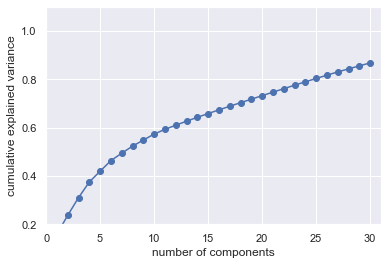

In [45]:
plt.plot(range(1,31),np.cumsum(pca.explained_variance_ratio_))
plt.scatter(range(1,31),np.cumsum(pca.explained_variance_ratio_))

plt.xlim(0,31)
plt.ylim(0.2,1.1)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [46]:
pca1 = PCA(n_components = 30)
pc1 = pca1.fit_transform(values)
pc1_df = pd.DataFrame(pc1,columns = ['pc_1','pc_2','pc_3','pc_4','pc_5','pc_6','pc_7','pc_8','pc_9','pc_10', 
                                     'pc_11', 'pc_12','pc_13','pc_14','pc_15','pc_16','pc_17','pc_18','pc_19','pc_20', 
                                     'pc_21', 'pc_22','pc_23','pc_24','pc_25','pc_26','pc_27','pc_28','pc_29','pc_30'])                                               
 
pc1_df["futchangeNPM"] = df_ratios["futchangeNPM"]
pc1_df

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,...,pc_22,pc_23,pc_24,pc_25,pc_26,pc_27,pc_28,pc_29,pc_30,futchangeNPM
0,0.728942,1.108700,-0.486131,2.132378,-0.542660,0.368311,1.715161,0.321362,-2.154374,1.205385,...,-0.578956,0.385215,0.052754,1.215325,-0.217066,1.312172,0.327439,0.623510,-0.738215,1.0
1,-0.183139,1.894637,0.152731,-1.588738,0.282711,-0.295784,0.294499,-0.007477,0.886791,-0.515343,...,-0.124414,-0.270892,0.014033,-0.038902,0.031917,0.465286,0.104442,-0.082856,-0.005955,1.0
2,-1.820122,2.302065,0.242837,-1.765273,0.173470,-0.014546,0.573522,0.078861,1.790718,0.032617,...,-0.146151,0.025653,-0.240358,0.064787,-0.431923,0.578537,0.049537,-0.127126,-0.393762,0.0
3,-1.875196,0.190750,0.034213,1.747504,-1.540418,1.135374,-1.091996,-0.199079,-1.638403,-0.759770,...,-0.076228,-0.278283,0.193650,0.293053,-0.171445,0.432650,0.356811,-0.365578,-0.916376,1.0
4,0.639526,-4.726226,-0.239831,-0.585798,-0.048241,-0.040297,0.071145,0.017781,0.788964,-0.760453,...,-0.279530,0.218049,-0.540737,0.605918,0.422983,0.942872,0.009686,0.160655,-0.324675,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,1.225156,0.468707,-0.266055,-0.648482,0.917191,-0.646677,0.971818,0.118596,-0.232010,2.269470,...,-0.394877,-0.358888,0.391343,-0.113889,-0.247413,-0.386660,-0.525943,-0.071861,-0.204288,0.0
2759,2.593600,1.007473,-0.346320,-0.383968,0.512970,-0.292169,0.844174,0.157538,-0.986421,2.550728,...,-0.251725,0.247215,0.209384,0.247612,-0.166642,0.341733,-0.509140,0.207397,-0.957290,1.0
2760,-1.028405,0.765486,-0.112164,0.233830,0.634258,-0.193083,0.199616,0.152249,0.223800,2.440829,...,-0.064517,0.048723,-0.470659,-0.087633,-0.949140,0.383932,-0.050124,0.186281,-0.061099,0.0
2761,1.501361,-0.389031,-0.330712,-0.105908,0.981838,-0.811999,1.795658,0.277332,0.077564,1.063678,...,-0.350482,-1.113092,0.808155,-1.139985,0.007721,-0.248109,0.200120,0.772060,2.080060,0.0


In [47]:
print(np.dot(pca1.components_[0],values.iloc[0]))

0.7708048800389092


In [48]:
Train, Test = train_test_split(pc1_df,
                               test_size=0.25,
                               random_state=42)
X_train, y_train = Train.iloc[:,:-1], Train.iloc[:,-1]
X_test, y_test = Test.iloc[:,:-1], Test.iloc[:,-1]

In [49]:
X_train.shape

(2072, 30)

In [50]:
model2 = sm.Logit(y_train, sm.add_constant(X_train)).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.664531
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           futchangeNPM   No. Observations:                 2072
Model:                          Logit   Df Residuals:                     2041
Method:                           MLE   Df Model:                           30
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                 0.01572
Time:                        15:48:06   Log-Likelihood:                -1376.9
converged:                       True   LL-Null:                       -1398.9
Covariance Type:            nonrobust   LLR p-value:                   0.04795
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4201      0.142     -2.962      0.003      -0.698      -0.142
pc_1          -0.0070      0.096     -0.072      0.942      -0.195       0.181
pc_2          -0.0023      0.081     -0.029      0.977      -0.160       0.156
pc_3          -0.4856      2.151     -0.226      0.821      -4.701       3.730
pc_4          -0.0492      0.243     -0.203      0.839      -0.525       0.426
pc_5          -0.0972      0.270     -0.359      0.719      -0.627       0.433
pc_6          -0.1206      0.286     -0.422      0.673      -0.681       0.439
pc_7          -0.0217      0.128     -0.169      0.866      -0.273       0.230
pc_8          -0.0271      0.048     -0.561      0.575      -0.122       0.068
pc_9          -0.0956      0.074     -1.289      0.198      -0.241       0.050
pc_10         -0.0451      0.140     -0.322      0.747      -0.320       0.229
pc_11          0.0747      0.101      0.739      0.460      -0.123       0.273
pc_12         -0.1202      0.068     -1.764      0.078      -0.254       0.013
pc_13         -0.0535      0.086     -0.620      0.535      -0.222       0.116
pc_14          0.2758      0.142      1.940      0.052      -0.003       0.555
pc_15          0.1663      0.108      1.540      0.124      -0.045       0.378
pc_16         -0.0350      0.109     -0.322      0.747      -0.248       0.178
pc_17         -0.0819      0.148     -0.555      0.579      -0.371       0.207
pc_18         -0.0589      0.174     -0.339      0.734      -0.399       0.281
pc_19          0.0540      0.075      0.715      0.475      -0.094       0.202
pc_20         -0.1148      0.122     -0.941      0.347      -0.354       0.124
pc_21         -0.1128      0.161     -0.700      0.484      -0.429       0.203
pc_22          0.0130      0.124      0.105      0.916      -0.230       0.256
pc_23          0.1382      0.137      1.007      0.314      -0.131       0.407
pc_24          0.1559      0.111      1.404      0.160      -0.062       0.374
pc_25         -0.1180      0.117     -1.006      0.315      -0.348       0.112
pc_26         -0.1014      0.082     -1.235      0.217      -0.262       0.060
pc_27          0.0241      0.087      0.276      0.782      -0.147       0.195
pc_28         -0.1661      0.104     -1.593      0.111      -0.370       0.038
pc_29         -0.1396      0.093     -1.508      0.132      -0.321       0.042
pc_30         -0.0783      0.066     -1.187      0.235      -0.208       0.051
==============================================================================
"""

In [51]:
predict_result2 = model2.predict(sm.add_constant(X_test))
predicted_choice = np.where(predict_result2 > 0.5,1,0)
accuracy2 = 1 - np.sum(abs(predicted_choice - y_test))/y_test.shape[0]
accuracy2

0.5658465991316932

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LR = LogisticRegression()
Lresult = LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.5629522431259045


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[378  14]
 [288  11]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.96      0.71       392
         1.0       0.44      0.04      0.07       299

    accuracy                           0.56       691
   macro avg       0.50      0.50      0.39       691
weighted avg       0.51      0.56      0.43       691



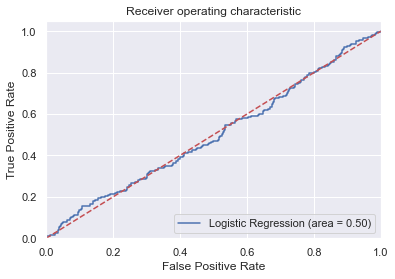

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Time series split

In [56]:
from sklearn.model_selection import TimeSeriesSplit
time_split = TimeSeriesSplit(n_splits=7)
time_split

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=7, test_size=None)

In [57]:
Train, Test = train_test_split(df_ratios_new, test_size=0.25, random_state=42)
X_train, y_train = Train.iloc[:,4:74], Train.iloc[:,3]
X_test, y_test = Test.iloc[:,4:74], Test.iloc[:,3]

In [58]:
X = df_ratios_new.iloc[:,4:74]
y = df_ratios_new.iloc[:,3]

In [59]:
for train_index, test_index in time_split.split(X):
        X_train = X[:len(train_index)] 
        X_test = X[len(train_index) : (len(train_index)+len(test_index))]
        y_train = y[:len(train_index)].values.ravel()
        y_test = y[len(train_index) : (len(train_index)+len(test_index))].values.ravel()

In [60]:
len(train_index), len(test_index)
### 2763 split into 7 slices + one last slice that is the test set. Hence last slice len is 2763/8 = 345
### train set len is 2763 - 345 = 2418

(2418, 345)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2418, 70), (345, 70), (2418,), (345,))

In [63]:
### for this set with test set at the time end, we continue to use a restricted set of features as in [20]
### multicollinearity and non-convergence of solution to logistic reg is still a problem
X_train2=X_train[Columns]
X_test2=X_test[Columns]                  

In [64]:
model3 = sm.Logit(y_train, sm.add_constant(X_train2)).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.668384
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2418
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           38
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                 0.01602
Time:                        15:56:06   Log-Likelihood:                -1616.2
converged:                       True   LL-Null:                       -1642.5
Covariance Type:            nonrobust   LLR p-value:                   0.05778
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.2175     33.121      0.459      0.646     -49.698      80.133
indret_vw               -0.1659      0.633     -0.262      0.793      -1.406       1.075
dpr_Mean                 0.0551      0.263      0.210      0.834      -0.459       0.570
PEG_trailing_Mean        0.0436      0.371      0.117      0.906      -0.684       0.771
bm_Mean                  0.2757      0.187      1.476      0.140      -0.090       0.642
CAPEI_Mean              -0.8151      0.646     -1.261      0.207      -2.082       0.452
divyield_Mean           -0.3674      0.191     -1.923      0.054      -0.742       0.007
pcf_Mean                 0.0607      0.387      0.157      0.875      -0.697       0.819
efftax_Mean              0.0854      0.300      0.284      0.776      -0.503       0.674
GProf_Mean              -0.1833      0.406     -0.451      0.652      -0.979       0.612
aftret_eq_Mean          -2.9691      7.887     -0.376      0.707     -18.427      12.489
aftret_equity_Mean      -1.9249      1.458     -1.320      0.187      -4.783       0.934
aftret_invcapx_Mean     -0.2941      0.317     -0.928      0.353      -0.915       0.327
gpm_Mean                -0.0364      0.294     -0.124      0.901      -0.612       0.539
pretret_noa_Mean        -0.1858      0.384     -0.484      0.628      -0.938       0.567
roce_Mean                0.8847      1.276      0.694      0.488      -1.615       3.385
roe_Mean                -0.2658      0.400     -0.665      0.506      -1.050       0.518
capital_ratio_Mean      -0.4371      0.436     -1.002      0.316      -1.292       0.418
rect_act_Mean           -0.5086      0.432     -1.177      0.239      -1.356       0.339
fcf_ocf_Mean             1.4520      7.838      0.185      0.853     -13.910      16.814
short_debt_Mean          0.0088      0.182      0.048      0.962      -0.349       0.366
profit_lct_Mean          0.4668      0.538      0.868      0.385      -0.587       1.520
curr_debt_Mean          -0.0772      0.185     -0.418      0.676      -0.439       0.285
dltt_be_Mean             0.0941      0.153      0.614      0.539      -0.206       0.394
int_debt_Mean            0.0929      0.088      1.053      0.292      -0.080       0.266
int_totdebt_Mean         0.0905      0.103      0.881      0.378      -0.111       0.292
de_ratio_Mean           -0.5282      0.518     -1.021      0.307      -1.542       0.486
debt_assets_Mean         0.3878      0.251      1.548      0.122      -0.103       0.879
debt_capital_Mean        0.3668      0.538      0.681      0.496      -0.688       1.422
cash_conversion_Mean     0.0556      0.108      0.516      0.606      -0.155       0.266
inv_turn_Mean           -0.0438      0.104     -0.419      0.675      -0.248       0.161
pay_turn_Mean           -0.1039      0.139     -0.748      0.455      -0.376       0.168
rect_turn_Mean          -0.1866      0.131     -1.423      0.155      -0.444       0.070
sale_equity_Mean         0.2547      

In [65]:
predict_result3 = model3.predict(sm.add_constant(X_test2))
predicted_choice = np.where(predict_result3 > 0.5,1,0)
### np.where() is a function that returns ndarray which is x if condition is True and y if False. x, y and condition need 
### to be broadcastable to same shape. Above, if result3 > 0.5, put value = 1, otherwise 0
accuracy3 = 1 - np.sum(abs(predicted_choice - y_test))/y_test.shape[0]
accuracy3
### ans here wrong if we had used pandas y_train, y_test and not np array because we apply numpy functions here on y_test

0.6057971014492753

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LR = LogisticRegression()
Lresult = LR.fit(X_train2, y_train)
y_pred = LR.predict(X_test2)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.6


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[190  24]
 [114  17]]


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73       214
         1.0       0.41      0.13      0.20       131

    accuracy                           0.60       345
   macro avg       0.52      0.51      0.47       345
weighted avg       0.55      0.60      0.53       345



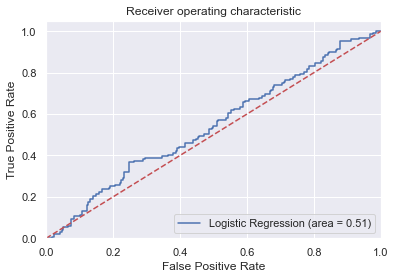

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LR.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()